In [17]:
%matplotlib inline
%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 1
import taranis.core.nn as ext_nn
from taranis.core.trainer.train import gpu_train, mnist_dataset, gpu_test_model, cifar100_dataset

In [19]:
dataset = datasets.MNIST(
    '../data', 
    train=True, 
    download=True
)
print(len(dataset))

image, label = dataset[2]
print(image.size, label)  # A Black and white image is a 2D matrix (28x28)
image

60000
(28, 28) 4


In [20]:
# linear = nn.Sequential(
#     nn.Flatten(),             
#     ext_nn.LinearIdentity(m, n),
#     nn.ReLU(),
#     ext_nn.LinearIdentity(n, m),
# )

# batch = transforms.ToTensor()(image)

# new = linear(batch).detach().view(28, 28).numpy()

# print(new.shape)
# plt.matshow(batch.squeeze(0), interpolation=None, cmap='Greys')
# plt.matshow(new, interpolation=None, cmap='Greys')
# plt.show()

In [21]:
dataset_fast = mnist_dataset()
dataset_test_fast = mnist_dataset(train=False)

# cifar_train = cifar100_dataset(True, True)
# cifar_test = cifar100_dataset(False, True)

In [57]:
classes = 10
dataset = dataset_fast
dataset_test = dataset_test_fast
input_shape = tuple(dataset[0][0].shape)
epoch = 100
m = 1
for d in input_shape:
    m *= d
n = m * 10
lr = 1
lr_map = {0: 2}
print(input_shape, m, n)

(1, 28, 28) 784 7840


In [58]:
# cifar_train[0]

In [59]:
linear = nn.Sequential(
    nn.Flatten(),             
    nn.Linear(m, n),
    nn.ReLU(),
    nn.Linear(n, classes),
    nn.Softmax(dim=1),
)

gpu_train(linear, dataset, epoch, lr=lr, lr_map=lr_map)
gpu_test_model(linear, dataset)
gpu_test_model(linear, dataset_test)

0 -0.025555684169133504
1 -0.03536695639292399
2 -0.0379931648572286
3 -0.03852124611536662
4 -0.03941693703333537
5 -0.04256021976470947
6 -0.04344993829727173
7 -0.043715135256449385
8 -0.04385221799214681
9 -0.0440597414970398
10 -0.044163020451863606
11 -0.04432543516159058
12 -0.044439419110616045
13 -0.0463610847791036
14 -0.050869258244832356
15 -0.053956902027130126
16 -0.054728591442108156
17 -0.05514369408289591
18 -0.05541585683822632
19 -0.05563295284907023
20 -0.055819602807362874
21 -0.05598190625508626
22 -0.05612589120864868
23 -0.05625528891881307
24 -0.05637274980545044
25 -0.0564799427986145
26 -0.056578528881072995
27 -0.056669898827870685
28 -0.05675488313039144
29 -0.05683398644129435
30 -0.056907927989959715
31 -0.05697723229726156
32 -0.057042276859283446
33 -0.05710335969924927
34 -0.05716089407602946
35 -0.057215221722920734
36 -0.057266736030578615
37 -0.05731560786565145
38 -0.05736196041107178
39 -0.05740603605906169
40 -0.0574479341506958
41 -0.05748776197

0 0 0.9998999834060669


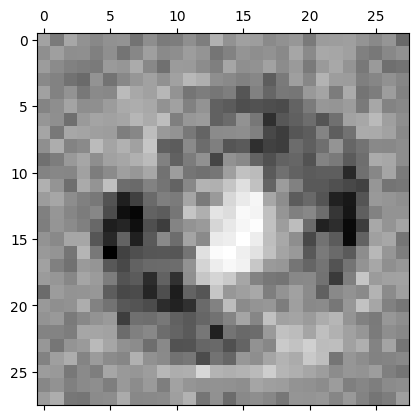

In [162]:
def derivable_cross_entroy(output, target):
    one_hot = torch.zeros((target.shape[0], classes))

    for i, t in enumerate(target):
        one_hot[i, int(t)] = 1
        
    return torch.log(output) @ one_hot.cuda().t()


from torch.autograd import Variable


linear.eval()
for param in linear.parameters():
    param.require_grads = False

import torch.optim as optim


abc = torch.zeros(1, *input_shape).cuda().requires_grad_(True)
assert abc.is_leaf
optimizer = optim.SGD([abc], lr=1)

label = 0
confidence = 0

while confidence < 0.9999:
    optimizer.zero_grad()
    output = linear(abc)
    loss = F.cross_entropy(output, torch.tensor([label], dtype=torch.long).cuda())
    loss.backward()
    optimizer.step()
    
    pred = output.argmax(dim=1, keepdim=True) 
    confidence = output[0, label]

print(pred.item(), label, confidence.item())
plt.matshow(-abc.grad[0][0].detach().cpu(), interpolation=None, cmap='Greys')
plt.show()

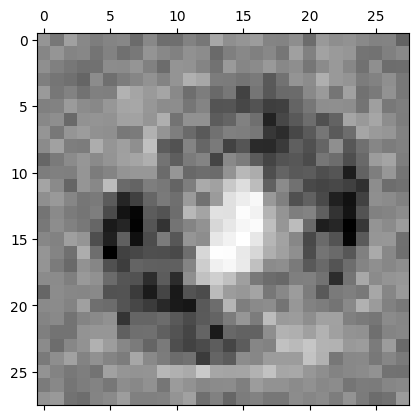

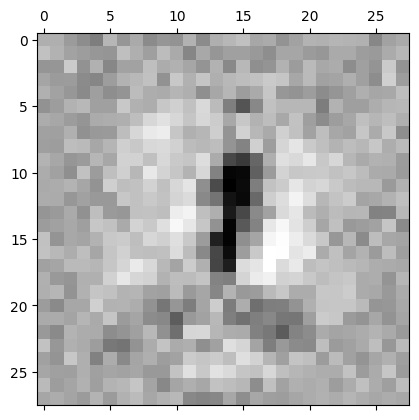

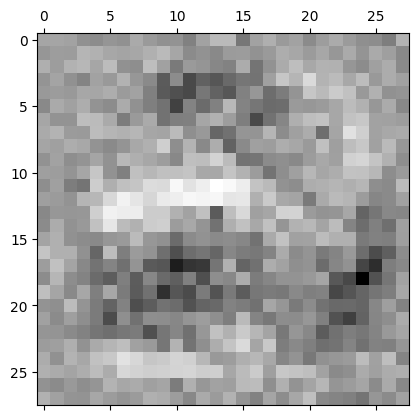

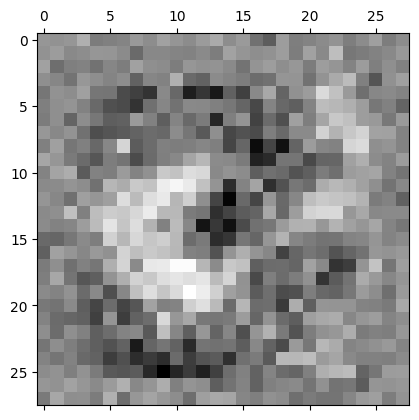

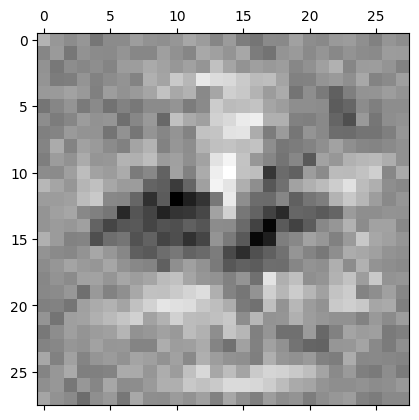

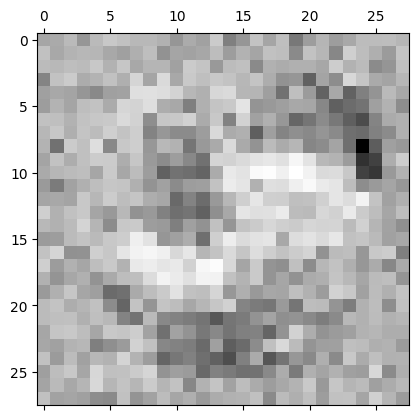

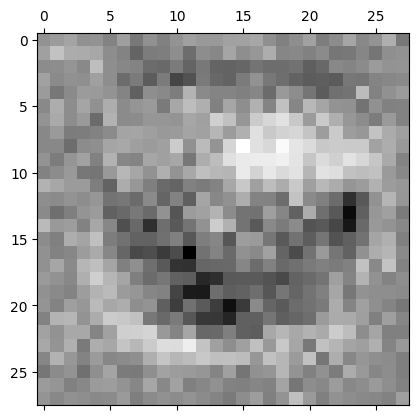

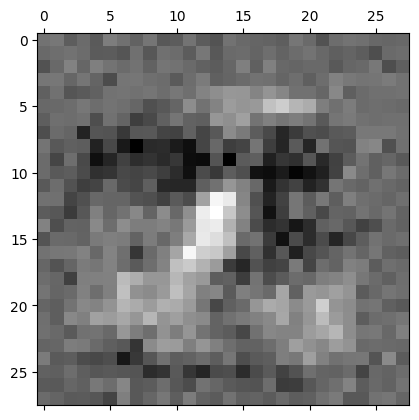

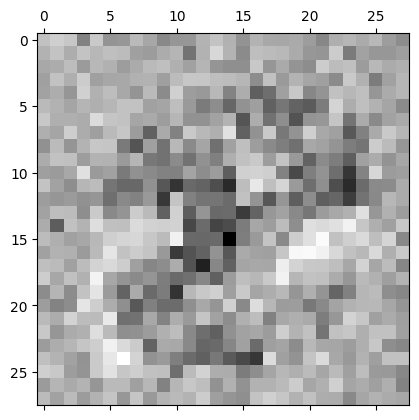

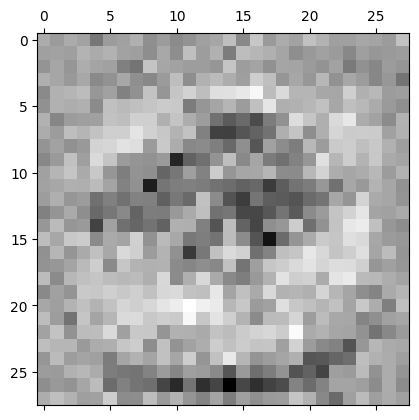

In [167]:
import importlib
import taranis
import taranis.core.visualization.extract as extract
importlib.reload(taranis.core.visualization.extract)

for i in range(10):
    img = extract.generate_image(linear, input_shape, i, 1, 0.9999)
    plt.matshow(img[0][0], interpolation=None, cmap='Greys')
    plt.show()

In [82]:
output = linear(image)
loss = F.cross_entropy(output, torch.tensor([1], dtype=torch.long).cuda())
loss
loss.backward()

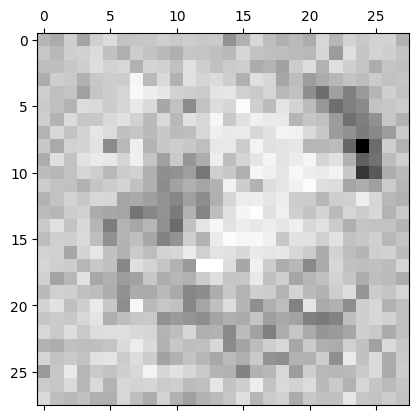

In [33]:
import taranis.core.nn as ext_nn

linear = nn.Sequential(
    nn.Flatten(),             
    ext_nn.LinearIdentity(m, n),
    nn.ReLU(),
    ext_nn.LinearIdentity(n, classes),
    nn.Softmax(dim=1),
)

gpu_train(linear, dataset, 100, lr=lr, lr_map=lr_map)
gpu_test_model(linear, dataset)
gpu_test_model(linear, dataset_test)

0 -0.025855847199757895
1 -0.03305356502532959
2 -0.0333518385887146
3 -0.03350720405578613
4 -0.0336058775583903
5 -0.033682103951772055
6 -0.033739880720774336
7 -0.0337876836458842
8 -0.033828870455423994
9 -0.03386344909667969
10 -0.03389474153518677
11 -0.033921349048614505
12 -0.033944257100423175
13 -0.033961776892344156
14 -0.03397780259450277
15 -0.03399474223454793
16 -0.034009210268656415
17 -0.034020551045735675
18 -0.0340305765469869
19 -0.034040276209513345
20 -0.0340502659479777
21 -0.03406020005544027
22 -0.03406988382339478
23 -0.03407861391703288
24 -0.03408615191777547
25 -0.034093423684438066
26 -0.03410022258758545
27 -0.03410675128300985
28 -0.034113192558288576
29 -0.03411925236384074
30 -0.034125296274820964
31 -0.034131773312886554
32 -0.03413831392923991
33 -0.03414405981699626
34 -0.03414921760559082
35 -0.034153703848520914
36 -0.034157633781433105
37 -0.034161420663197835
38 -0.03416534662246704
39 -0.03416927258173625
40 -0.03417319854100545
41 -0.03417684

KeyboardInterrupt: 

In [34]:
import math

linear = nn.Sequential(
    ext_nn.MaskLayer(input_shape, True),
    nn.Flatten(),             
    nn.Linear(m, n),
    nn.ReLU(),
    nn.Linear(n, 10),
    nn.Softmax(dim=1),
)
# nn.init.kaiming_uniform_(list(linear.children())[0].weight, a=math.sqrt(5))

gpu_train(linear, dataset, epoch, lr=lr, lr_map=lr_map)
gpu_test_model(linear, dataset)
gpu_test_model(linear, dataset_test)

0 -0.006673250099023183
1 -0.006693302094936371
2 -0.006725814441839854
3 -0.006791658202807109
4 -0.006949969132741292
5 -0.007450894514719645
6 -0.01029404600461324
7 -0.015508286158243815
8 -0.026666657129923502
9 -0.03587265809377035
10 -0.04214041630427043
11 -0.04457614421844482
12 -0.045877838134765626
13 -0.04671330054601033
14 -0.04766329526901245
15 -0.050970753033955894
16 -0.05199408928553263
17 -0.052573045094807945
18 -0.052996317545572914
19 -0.053338428338368736
20 -0.05362682342529297
21 -0.05387606223424276
22 -0.05409533580144246
23 -0.0542911171913147
24 -0.05446806351343791
25 -0.05462963581085205
26 -0.05477875868479411
27 -0.05491885741551717
28 -0.05505885283152263
29 -0.05538970629374186
30 -0.05722528298695882
31 -0.05850963592529297
32 -0.058987804253896076
33 -0.059304277102152504
34 -0.05955933729807536
35 -0.059779131412506105
36 -0.059975095589955646
37 -0.06015317440032959
38 -0.060316729545593264
39 -0.06046823263168335
40 -0.060609809557596844
41 -0.06

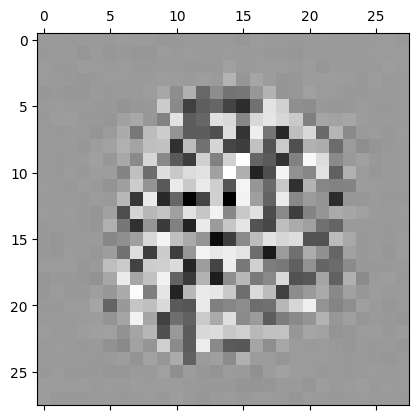

In [35]:
plt.matshow(list(linear.children())[0].weight[0].detach().cpu(), interpolation=None, cmap='Greys')
plt.show()

In [16]:
linear = nn.Sequential(
    ext_nn.MaskLayer(input_shape, True),
    nn.Flatten(),             
    ext_nn.LinearIdentity(m, n),
    nn.ReLU(),
    ext_nn.LinearIdentity(n, 10),
    nn.Softmax(dim=1),
)
          
gpu_train(linear, dataset, epoch, lr=lr, lr_map=lr_map)
gpu_test_model(linear, dataset)
gpu_test_model(linear, dataset_test)

0 -0.0066677391529083255
1 -0.006668297946453095
2 -0.006668853759765625
3 -0.0066694115598996484
4 -0.006669969856739044
5 -0.00667052815357844
6 -0.006671087940533956
7 -0.006671648720900218
8 -0.00667220950126648
9 -0.006672769784927368
10 -0.006673331061999003
11 -0.006673892339070638
12 -0.006674454112847646
13 -0.006675017873446146
14 -0.006675581137339274
15 -0.006676144401232402
16 -0.006676707168420156
17 -0.006677271922429403
18 -0.006677836179733276
19 -0.006678399940331777
20 -0.006678963204224905
21 -0.006679527461528778
22 -0.006680091222127278
23 -0.0066806554794311525
24 -0.006681221723556519
25 -0.006681787967681885
26 -0.006682356695334116
27 -0.006682927906513214
28 -0.0066835001111030575
29 -0.0066840743025143945
30 -0.006684649487336477
31 -0.006685227652390798
32 -0.006685807804266612


KeyboardInterrupt: 

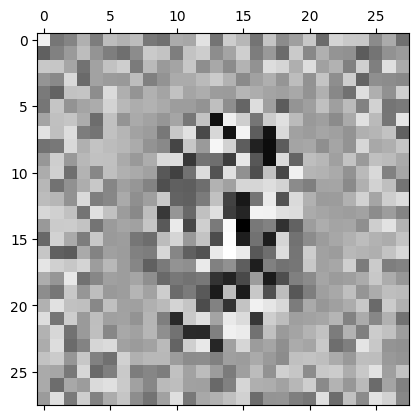

In [13]:
plt.matshow(list(linear.children())[0].weight.detach().cpu(), interpolation=None, cmap='Greys')
plt.show()

In [14]:
list(linear.children())[0].weight.min()

tensor(-0.1497, device='cuda:0', grad_fn=<MinBackward1>)

In [14]:
# mnist_dataset()

In [10]:
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size = 128,
        num_workers = 0,
    )

In [11]:
b = next(iter(dataloader))
b

[tensor([[[[ 1.8431,  1.8431,  1.8431,  ...,  0.9633,  1.2126,  0.7727],
           [ 1.8431,  1.8284,  1.8284,  ...,  0.5968,  0.4648,  0.2449],
           [ 1.8431,  1.8284,  1.8431,  ...,  0.8754,  0.5381, -0.1217],
           ...,
           [ 0.2742,  0.1862,  0.1569,  ..., -1.4560, -0.9428, -0.7815],
           [-0.1070, -0.1364, -0.0484,  ..., -1.5733, -0.4736,  0.1716],
           [-0.6202, -0.6056, -0.4150,  ..., -1.3974, -0.3563,  0.1276]],
 
          [[ 2.0015,  2.0015,  2.0015,  ...,  1.2370,  1.5275,  1.0688],
           [ 2.0015,  1.9862,  1.9862,  ...,  0.7936,  0.6713,  0.4572],
           [ 2.0015,  1.9862,  2.0015,  ...,  1.1453,  0.8242,  0.1361],
           ...,
           [ 0.9312,  0.8853,  0.8394,  ..., -1.6376, -0.9495, -0.7202],
           [ 0.5031,  0.4725,  0.5489,  ..., -1.6529, -0.1850,  0.5642],
           [-0.0321, -0.0321,  0.1514,  ..., -1.3471,  0.1361,  0.7477]],
 
          [[ 2.0256,  2.0256,  2.0256,  ...,  1.1449,  1.3011,  0.7756],
           [ 

In [13]:
l = ext_nn.MaskLayer(input_shape).cuda()

In [16]:
b[0].shape

torch.Size([128, 3, 32, 32])

In [18]:
l(b[0]).mean()

tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)